## Name: Roy (Yiming) Chen

We are often required to make inferences based on limited amounts of data.  In this dataset, with more variables 
than observations, traditional tools such as logistic regression fail. 
You'll be provided with a dataset with 300 random variables (each drawn from [0,1]). A secret algorithm was used to compute a 
binary target variable based on these data.

The training dataset has 250 rows, and the test dataset has 19,750 rows. 
The goal is to build a model based on the training dataset that accurately classifies the test dataset.


## Solution

From the description of the problem, it seems that the data was created by using random number generater.

First, let's import all the packages that we will use in the solution.

In [1]:
# import all the packages we might use for the exercise
import csv
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn.cross_validation as cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model, datasets
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn import cluster, datasets
from IPython.display import Image  
from sklearn.externals.six import StringIO  
dot_data = StringIO()  
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy import interp
from sklearn.metrics import confusion_matrix

#set the printing option to 301 so that the result will show all rows and columns
pd.set_option('max_rows', 301)
pd.set_option('max_columns', 301)

Now that we have imported all the packages, we will import the data.

In [3]:
#import the csv file as a pandas data frame
userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'takehome', 'takehome_test.csv')
df=pd.read_csv(csvfile)

#separate the data into training and test set. I drop the train test indicator after separating the data.
train, test =df[df['train_test']==0].drop('train_test',1), df[df['train_test']==1].drop('train_test',1)

## Data exploration
Check if the datasets have the right size (# of rows and columns).

In [6]:
#check the dimension of the data
train.shape,test.shape

((250, 301), (17574, 301))

Although we know that the data is generated through random generator, let's explore the data and make sure there is no nulls and that the mean looks fine

In [4]:
#check the summary of all the variables in training dataset
train.describe()

,target,rand1,rand2,rand3,rand4,rand5,rand6,rand7,rand8,rand9,rand10,rand11,rand12,rand13,rand14,rand15,rand16,rand17,rand18,rand19,rand20,rand21,rand22,rand23,rand24,rand25,rand26,rand27,rand28,rand29,rand30,rand31,rand32,rand33,rand34,rand35,rand36,rand37,rand38,rand39,rand40,rand41,rand42,rand43,rand44,rand45,rand46,rand47,rand48,rand49,rand50,rand51,rand52,rand53,rand54,rand55,rand56,rand57,rand58,rand59,rand60,rand61,rand62,rand63,rand64,rand65,rand66,rand67,rand68,rand69,rand70,rand71,rand72,rand73,rand74,rand75,rand76,rand77,rand78,rand79,rand80,rand81,rand82,rand83,rand84,rand85,rand86,rand87,rand88,rand89,rand90,rand91,rand92,rand93,rand94,rand95,rand96,rand97,rand98,rand99,rand100,rand101,rand102,rand103,rand104,rand105,rand106,rand107,rand108,rand109,rand110,rand111,rand112,rand113,rand114,rand115,rand116,rand117,rand118,rand119,rand120,rand121,rand122,rand123,rand124,rand125,rand126,rand127,rand128,rand129,rand130,rand131,rand132,rand133,rand134,rand135,rand136,rand137,rand138,rand139,rand140,rand141,rand142,rand143,rand144,rand145,rand146,rand147,rand148,rand149,rand150,rand151,rand152,rand153,rand154,rand155,rand156,rand157,rand158,rand159,rand160,rand161,rand162,rand163,rand164,rand165,rand166,rand167,rand168,rand169,rand170,rand171,rand172,rand173,rand174,rand175,rand176,rand177,rand178,rand179,rand180,rand181,rand182,rand183,rand184,rand185,rand186,rand187,rand188,rand189,rand190,rand191,rand192,rand193,rand194,rand195,rand196,rand197,rand198,rand199,rand200,rand201,rand202,rand203,rand204,rand205,rand206,rand207,rand208,rand209,rand210,rand211,rand212,rand213,rand214,rand215,rand216,rand217,rand218,rand219,rand220,rand221,rand222,rand223,rand224,rand225,rand226,rand227,rand228,rand229,rand230,rand231,rand232,rand233,rand234,rand235,rand236,rand237,rand238,rand239,rand240,rand241,rand242,rand243,rand244,rand245,rand246,rand247,rand248,rand249,rand250,rand251,rand252,rand253,rand254,rand255,rand256,rand257,rand258,rand259,rand260,rand261,rand262,rand263,rand264,rand265,rand266,rand267,rand268,rand269,rand270,rand271,rand272,rand273,rand274,rand275,rand276,rand277,rand278,rand279,rand280,rand281,rand282,rand283,rand284,rand285,rand286,rand287,rand288,rand289,rand290,rand291,rand292,rand293,rand294,rand295,rand296,rand297,rand298,rand299,rand300
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,

In [14]:
#check the summary of all the variables in test dataset
test.describe()

,target,rand1,rand2,rand3,rand4,rand5,rand6,rand7,rand8,rand9,rand10,rand11,rand12,rand13,rand14,rand15,rand16,rand17,rand18,rand19,rand20,rand21,rand22,rand23,rand24,rand25,rand26,rand27,rand28,rand29,rand30,rand31,rand32,rand33,rand34,rand35,rand36,rand37,rand38,rand39,rand40,rand41,rand42,rand43,rand44,rand45,rand46,rand47,rand48,rand49,rand50,rand51,rand52,rand53,rand54,rand55,rand56,rand57,rand58,rand59,rand60,rand61,rand62,rand63,rand64,rand65,rand66,rand67,rand68,rand69,rand70,rand71,rand72,rand73,rand74,rand75,rand76,rand77,rand78,rand79,rand80,rand81,rand82,rand83,rand84,rand85,rand86,rand87,rand88,rand89,rand90,rand91,rand92,rand93,rand94,rand95,rand96,rand97,rand98,rand99,rand100,rand101,rand102,rand103,rand104,rand105,rand106,rand107,rand108,rand109,rand110,rand111,rand112,rand113,rand114,rand115,rand116,rand117,rand118,rand119,rand120,rand121,rand122,rand123,rand124,rand125,rand126,rand127,rand128,rand129,rand130,rand131,rand132,rand133,rand134,rand135,rand136,rand137,rand138,rand139,rand140,rand141,rand142,rand143,rand144,rand145,rand146,rand147,rand148,rand149,rand150,rand151,rand152,rand153,rand154,rand155,rand156,rand157,rand158,rand159,rand160,rand161,rand162,rand163,rand164,rand165,rand166,rand167,rand168,rand169,rand170,rand171,rand172,rand173,rand174,rand175,rand176,rand177,rand178,rand179,rand180,rand181,rand182,rand183,rand184,rand185,rand186,rand187,rand188,rand189,rand190,rand191,rand192,rand193,rand194,rand195,rand196,rand197,rand198,rand199,rand200,rand201,rand202,rand203,rand204,rand205,rand206,rand207,rand208,rand209,rand210,rand211,rand212,rand213,rand214,rand215,rand216,rand217,rand218,rand219,rand220,rand221,rand222,rand223,rand224,rand225,rand226,rand227,rand228,rand229,rand230,rand231,rand232,rand233,rand234,rand235,rand236,rand237,rand238,rand239,rand240,rand241,rand242,rand243,rand244,rand245,rand246,rand247,rand248,rand249,rand250,rand251,rand252,rand253,rand254,rand255,rand256,rand257,rand258,rand259,rand260,rand261,rand262,rand263,rand264,rand265,rand266,rand267,rand268,rand269,rand270,rand271,rand272,rand273,rand274,rand275,rand276,rand277,rand278,rand279,rand280,rand281,rand282,rand283,rand284,rand285,rand286,rand287,rand288,rand289,rand290,rand291,rand292,rand293,rand294,rand295,rand296,rand297,rand298,rand299,rand300
count,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.00000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.00000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.000000,17574.

In [15]:
#Check if there are any nulls in the dataset
df.apply(lambda x: sum(x.isnull()))

target        0
rand1         0
rand2         0
rand3         0
rand4         0
rand5         0
rand6         0
rand7         0
rand8         0
rand9         0
rand10        0
rand11        0
rand12        0
rand13        0
rand14        0
rand15        0
rand16        0
rand17        0
rand18        0
rand19        0
rand20        0
rand21        0
rand22        0
rand23        0
rand24        0
rand25        0
rand26        0
rand27        0
rand28        0
rand29        0
rand30        0
rand31        0
rand32        0
rand33        0
rand34        0
rand35        0
rand36        0
rand37        0
rand38        0
rand39        0
rand40        0
rand41        0
rand42        0
rand43        0
rand44        0
rand45        0
rand46        0
rand47        0
rand48        0
rand49        0
rand50        0
rand51        0
rand52        0
rand53        0
rand54        0
rand55        0
rand56        0
rand57        0
rand58        0
rand59        0
rand60        0
rand61        0
rand62  

What we learn is that there are no nulls in the csv. Also, it seems that the mean for all random variables are around 0.5. Which means that the random generator is done with a even distribution among the two classes.

## Modelling Approach

There are many modelling techniques to deal with problem where p>n. 
1. PCA for dimension reduction and build LM on the principle components
2. Regularization such as Lasso, Ridge and Elastic Net to penalize or eliminate the noise
3. Ensemble tree method such as random forest to build multiple low depth trees. (Although from my past experience, GBM usually outperforms random forest on any prediction problems including p>>n)
4. Data exploration to get rid of variables that have 0 variance (same value across the column), and mostly nulls (this step is done, we cannot eliminate any variables)
5. Use BIC, AIC to control for number of variables
6. Partial Least Squrare (PLS) classification

For this excercise, I will use Random Forest to solve the p>n problem.
The modelling exercise will be done on the training data (250 rows). 
10 Fold cross validation will be used to evaluate the model performance and tune the paremeters.

In [9]:
#Define target variable
target='target'

#define initial classifier
clf=RandomForestClassifier (random_state=0 , n_estimators= 50,  max_features='auto',max_depth=2)

#define cross validation parameter
cv = KFold(len(train),n_folds=10, shuffle=False, random_state=None)


#write a re-usable module to plot the inital random forests performance on 10-fold cross validation
#cross vallidation performance
def cross_validate_perf (df, cv,clf, target):
    #define inital true positive rate and the spacing for false positive rate
    mean_tpr = 0.0
    mean_tpr_train = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train, test) in enumerate(cv):
        #print (train, test)
        #create probability score for training and crossvalidation data set
        probas_training = clf.fit(df.drop(target,1).values[train], df.target.values[train]).predict_proba(df.drop(target,1).values[train])
        probas_ = clf.fit(df.drop(target,1).values[train], df.target.values[train]).predict_proba(df.drop(target,1).values[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(df.target.values[test], probas_[:, 1])
        fpr_train, tpr_train, thresholds_train = roc_curve(df.target.values[train], probas_training[:, 1])
        #get the average ptc by using interpolation for each iteration
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr_train += interp(mean_fpr, fpr_train, tpr_train)        
        mean_tpr[0] = 0.0
        mean_tpr_train[0] = 0.0
        roc_auc = auc(fpr, tpr)
        roc_auc_train = auc(fpr_train, tpr_train)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    #plot the random line 
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    
    #calculate the mean of the tpr for both training and test data
    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_tpr_train /= len(cv)
    mean_tpr_train[-1] = 1.0
    mean_auc_train = auc(mean_fpr, mean_tpr_train)
    #plot the average curve
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)
    plt.plot(mean_fpr, mean_tpr_train, 'k--',label='Mean Training ROC (AUC = %0.2f)' % mean_auc_train, lw=2, color='red')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


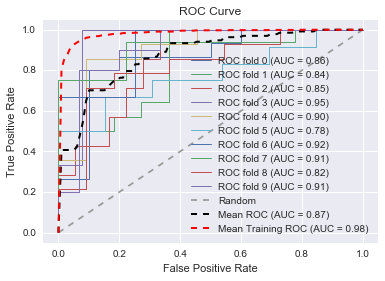

In [19]:
#execute the module with initial RF paremeters:
    
cross_validate_perf (train,cv, clf,'target')

We can see that the training data has pretty good AUC performance, whereas the validation is lower.

Next, let's print some variable importance:

In [20]:
#module to plot variable importance from different algorithsm
def features_print(predicted_fit, training_var):
    importances = predicted_fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(len(training_var.columns.values)-1):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), training_var.columns.values[indices[f]])


In [22]:
#execute module for variable importance
features_print(clf, train.drop(['%s' % target],1))

Feature ranking:
1. feature 68 (0.089507) rand69
2. feature 107 (0.047655) rand108
3. feature 200 (0.034608) rand201
4. feature 6 (0.032124) rand7
5. feature 203 (0.031043) rand204
6. feature 169 (0.027629) rand170
7. feature 46 (0.025578) rand47
8. feature 189 (0.023240) rand190
9. feature 164 (0.023095) rand165
10. feature 125 (0.022827) rand126
11. feature 146 (0.022514) rand147
12. feature 43 (0.020273) rand44
13. feature 158 (0.018342) rand159
14. feature 228 (0.017653) rand229
15. feature 297 (0.017514) rand298
16. feature 40 (0.017423) rand41
17. feature 185 (0.016391) rand186
18. feature 150 (0.014163) rand151
19. feature 37 (0.013819) rand38
20. feature 190 (0.013719) rand191
21. feature 4 (0.012855) rand5
22. feature 216 (0.012692) rand217
23. feature 195 (0.011555) rand196
24. feature 288 (0.011452) rand289
25. feature 266 (0.011402) rand267
26. feature 264 (0.010653) rand265
27. feature 178 (0.010488) rand179
28. feature 183 (0.010485) rand184
29. feature 259 (0.010301) ran

## Model Tuning

At this point, let's start tuning the RF algorithsm using grid search.

In [24]:
# Module to tune the machine learning algorithm using grid search. 
#This is a brute force method to check every combination of the method.
def gridsearch (param_test, clf, df, target):
    gsearch1 = GridSearchCV(estimator = clf, 
    param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
    gsearch1.fit(df.drop(target,1),df[target])
    return (gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

First, Let's check which combination of # of trees and tree depth is the best.

In [26]:
#execute the grid search module with different # of trees and depth
gridsearch ({'n_estimators':[100,150,175,190,200,210,220], 'max_depth':list(range(2,5,1))},
            RandomForestClassifier( random_state=0 ,max_features='auto'), train, 'target')    

([mean: 0.90235, std: 0.06002, params: {'max_depth': 2, 'n_estimators': 100},
  mean: 0.90012, std: 0.05521, params: {'max_depth': 2, 'n_estimators': 150},
  mean: 0.90743, std: 0.06292, params: {'max_depth': 2, 'n_estimators': 175},
  mean: 0.91197, std: 0.06936, params: {'max_depth': 2, 'n_estimators': 190},
  mean: 0.91795, std: 0.06289, params: {'max_depth': 2, 'n_estimators': 200},
  mean: 0.91449, std: 0.07100, params: {'max_depth': 2, 'n_estimators': 210},
  mean: 0.91508, std: 0.06821, params: {'max_depth': 2, 'n_estimators': 220},
  mean: 0.86365, std: 0.06607, params: {'max_depth': 3, 'n_estimators': 100},
  mean: 0.88745, std: 0.06232, params: {'max_depth': 3, 'n_estimators': 150},
  mean: 0.89408, std: 0.07794, params: {'max_depth': 3, 'n_estimators': 175},
  mean: 0.90005, std: 0.07395, params: {'max_depth': 3, 'n_estimators': 190},
  mean: 0.90385, std: 0.07507, params: {'max_depth': 3, 'n_estimators': 200},
  mean: 0.90040, std: 0.08410, params: {'max_depth': 3, 'n_estim

The result shows that 200 trees with a depth of 2 gives the best auc. The result of 0.918 is better than our initial AUC of 0.87.

Next, let's tune the min sample leaf and min sample split.

In [27]:
gridsearch ({'min_samples_leaf':list(range(1,10,2)), 'min_samples_split':list(range(2,10,2))}, 
            RandomForestClassifier(random_state=0 ,n_estimators=200, max_depth=2,max_features='auto' ), train, 'target')    

([mean: 0.91795, std: 0.06289, params: {'min_samples_split': 2, 'min_samples_leaf': 1},
  mean: 0.91795, std: 0.06289, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 6, 'min_samples_leaf': 1},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 8, 'min_samples_leaf': 1},
  mean: 0.91795, std: 0.06289, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 4, 'min_samples_leaf': 3},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 6, 'min_samples_leaf': 3},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 8, 'min_samples_leaf': 3},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 2, 'min_samples_leaf': 5},
  mean: 0.91795, std: 0.06289, params: {'min_samples_leaf': 5, 'min_samples_split': 4},
  mean: 0.91795, std: 0.06289, params: {'min_samples_split': 6, 'min_samples_leaf': 5},
  mean: 0.91795, std: 0.06289, p

The AUC didn't change this time. The optimal min sample leaf and min sample split is the default value 1 and 2.

Next, let's tune the the max features we should use for each split.
This is quite important for the p>>n problem since it would get rid of random noise in the attributes.

In [28]:
gridsearch ({'max_features':list(range(5,40,5))}, RandomForestClassifier(random_state=0, min_samples_leaf=1, 
            min_samples_split=2, n_estimators=200, max_depth=2), train, 'target')    

([mean: 0.86446, std: 0.06120, params: {'max_features': 5},
  mean: 0.88270, std: 0.06961, params: {'max_features': 10},
  mean: 0.89227, std: 0.08701, params: {'max_features': 15},
  mean: 0.91312, std: 0.07028, params: {'max_features': 20},
  mean: 0.91538, std: 0.07062, params: {'max_features': 25},
  mean: 0.92999, std: 0.05325, params: {'max_features': 30},
  mean: 0.92224, std: 0.06779, params: {'max_features': 35}],
 {'max_features': 30},
 0.92998849441157128)

It shows that the optimal max_features is 30. Again, the AUC has increased to 0.93.

now, let's update our classifier and plot the ROC curve again.

In [7]:
#define new updated classifier
clf=RandomForestClassifier (random_state=0, min_samples_leaf=1, 
            min_samples_split=2, n_estimators=200, max_depth=2, max_features=30)

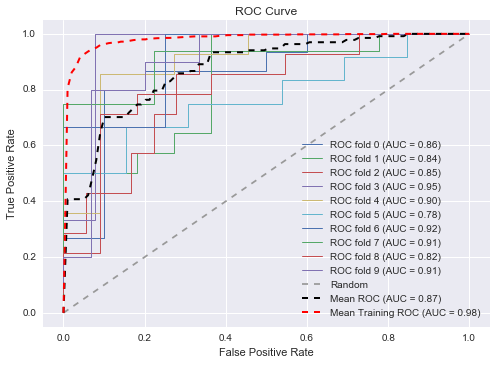

In [10]:
#run the ROC curve again to visualize it
cross_validate_perf (train,cv, clf,'target')


## Performance Validation Using the Testing Dataset
We have reach a reasonable parameters for the model. Let's use it and check the ROC performance on the test dataset.

In [11]:

#module to check the performance of the test dataset by using the model from training data.
def test_perf (df, test,clf, target):
    
    mean_tpr = 0.0
    mean_tpr_train = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    probas_training = clf.fit(df.drop(target,1).values, df.target.values).predict_proba(df.drop(target,1).values)
    probas_ = clf.fit(df.drop(target,1).values, df.target.values).predict_proba(test.drop(target,1).values)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(test.target.values, probas_[:, 1])
    fpr_train, tpr_train, thresholds_train = roc_curve(df.target.values, probas_training[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr_train += interp(mean_fpr, fpr_train, tpr_train)        
    mean_tpr[0] = 0.0
    mean_tpr_train[0] = 0.0
    roc_auc = auc(fpr, tpr)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr, tpr, lw=1, label='ROC Test(AUC = %0.2f)' % ( roc_auc))
    plt.plot(fpr_train, tpr_train, lw=1, label='ROC Train (AUC = %0.2f)' % ( roc_auc_train))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


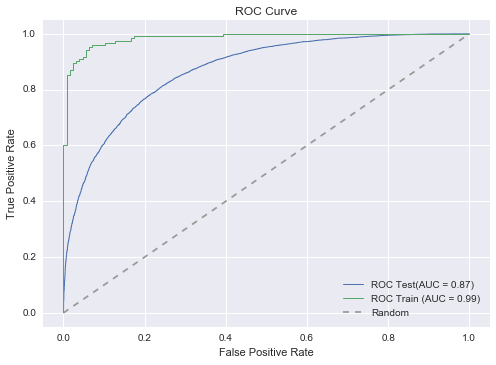

In [12]:
#execute the module to get the ROC performance of the test data
test_perf (train, test,clf, 'target')

The ROC curve shows that the model is performing very well on the test dataset.

## Final model output

A real business problem will analyze the ROC curve to pick a FPR or TPR for the optimal score cut off on the binary 1/0 prediction. Or if you have the NPV for each FP and TP case, you can get the NPV curve by FPR. In this case, you can determine the best cut off based on NPV.

Here I am just picking the default 0.5 for the classification.

In [53]:
#get the binary prediction from the model
pred = clf.fit(train.drop(target,1).values, train.target.values).predict(test.drop(target,1).values)
pred_prob = clf.fit(train.drop(target,1).values, train.target.values).predict_proba(test.drop(target,1).values)


In [54]:
#get the confusion matrix of the model
pred_new= (pred_prob[:,1]>=0.5).astype(int)
confusion_matrix(test.target, pred_new)

array([[7244, 1488],
       [1379, 7463]])

## Extra: A GBM model

Here is an example of running a GBM model. It has better performance than the random forest method.

In [14]:
#run a new classifier on GBM
clf2=GradientBoostingClassifier (n_estimators= 200, learning_rate= 0.1,  random_state=0 )
pred = clf2.fit(train.drop(target,1).values, train.target.values).predict(test.drop(target,1).values)
pred_prob = clf2.fit(train.drop(target,1).values, train.target.values).predict_proba(test.drop(target,1).values)


In [15]:
#get the confusion matrix of the model
pred_new= (pred_prob[:,1]>=0.5).astype(int)
confusion_matrix(test.target, pred_new)

array([[7175, 1557],
       [ 935, 7907]])

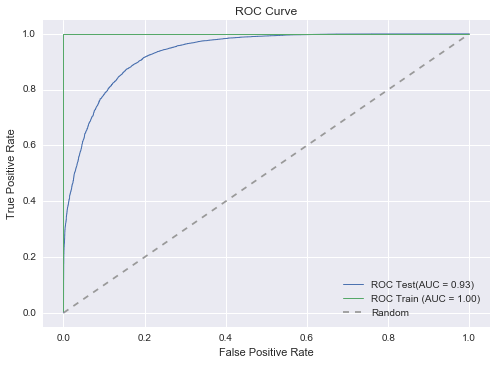

In [16]:
#check the performance chart for GBM
test_perf (train, test,clf2, 'target')

In [64]:
np.savetxt("output_pred.csv", pred_new, delimiter=",")